In [1]:
# edit
import warnings
warnings.filterwarnings(action= 'ignore')
#!pip install tensorflow

In [2]:
!pip install keras

In [3]:
!pip install tensorflow

In [4]:
# Create your first MLP in Keras
from keras.models import Sequential
#from tensorflow.keras import Sequential

In [5]:
import pandas as pd
from keras.layers import Dense
import numpy as np

In [19]:
df= pd.read_csv(r'C:\Users\Kashi\Downloads\forestfires.csv')


In [20]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [21]:
df =df.drop(columns=['monthfeb', 'monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep','daymon','daysat','daysun','daythu','daytue','daywed','dayfri','monthapr','monthaug','monthdec'])

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['month']= le.fit_transform(df['month'])
df['day']= le.fit_transform(df['day'])
df['size_category'] = le.fit_transform(df['size_category'])
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [32]:

# Split into input (X) and output (Y) variables
# Use square bracket notation to select columns
x = df.iloc[:, 0:11]
y = df['size_category']




In [29]:
len(df)

517

In [30]:
df['size_category'].unique()

array([1, 0])

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [34]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=11,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(10,  activation='relu')) #3nd layer
model.add(Dense(1, activation='sigmoid')) #4th layer or output layer

In [37]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                240       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 571 (2.23 KB)
Trainable params: 571 (2.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Fit the model
history = model.fit(x, y, validation_split=0.2, epochs=30, batch_size=30)

Epoch 1/30


14/14 [==============================] - 4s 109ms/step - loss: 23.1634 - accuracy: 0.6901 - val_loss: 7.1855 - val_accuracy: 0.6635
Epoch 2/30
14/14 [==============================] - 0s 17ms/step - loss: 5.4895 - accuracy: 0.4915 - val_loss: 4.1259 - val_accuracy: 0.6923
Epoch 3/30
14/14 [==============================] - 0s 17ms/step - loss: 3.5302 - accuracy: 0.6416 - val_loss: 1.6492 - val_accuracy: 0.6827
Epoch 4/30
14/14 [==============================] - 0s 17ms/step - loss: 1.8124 - accuracy: 0.6392 - val_loss: 1.6900 - val_accuracy: 0.7500
Epoch 5/30
14/14 [==============================] - 0s 17ms/step - loss: 1.2760 - accuracy: 0.7022 - val_loss: 1.4163 - val_accuracy: 0.7788
Epoch 6/30
14/14 [==============================] - 0s 17ms/step - loss: 1.0322 - accuracy: 0.7433 - val_loss: 0.9949 - val_accuracy: 0.8365
Epoch 7/30
14/14 [==============================] - 0s 17ms/step - loss: 0.8258 - accuracy: 0.7530 - val_loss: 0.9946 - val_accuracy: 0.8077
Epoch 8/3

In [44]:
# evaluate the model
scores = model.evaluate(x, y)
print(model.metrics_names)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(scores)

17/17 [==============================] - 0s 2ms/step - loss: 0.1537 - accuracy: 0.9536
['loss', 'accuracy']
accuracy: 95.36%
[0.1536697894334793, 0.9535783529281616]


In [41]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

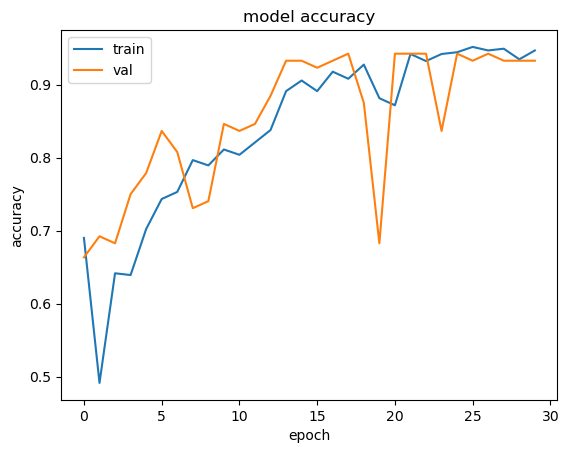

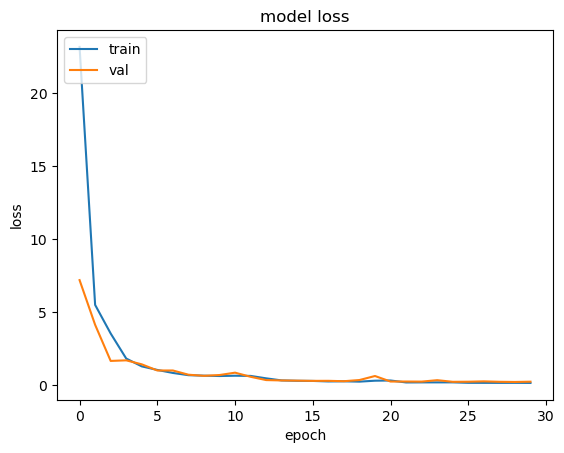

In [43]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
